In [1]:
import sys
sys.path.append("..")
import os, pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

from coh_tools import *
%matplotlib inline

/home/julien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.chdir("../pickled")
os.listdir()

['stim_data.pkl',
 'stim_alldata_notdelta_allbands.pkl',
 'base_data_notdelta_allbands.pkl',
 'stim_data_notdelta_allbands.pkl',
 'base_alldata_notdelta_allbands.pkl',
 'base_data.pkl']

In [3]:
base_data = pickle.load(open('base_alldata_notdelta_allbands.pkl', "rb"))
stim_data = pickle.load(open('stim_alldata_notdelta_allbands.pkl', "rb"))

In [4]:
print(len(base_data.keys()))
# base_data.keys()

390


In [5]:
# Get experiment info
os.chdir("../csvs")
experiments = pd.read_csv('table_of_experiments.csv')
experiments['keyname'] = experiments['File Name'].str[:-7]
# experiments

In [6]:
# # Get info of good channels

# M1_channels = pd.read_csv('M1_sites.csv')
# S1_channels = pd.read_csv('S1_sites.csv')

# electrode_dict = {}
# for i in range(M1_channels.shape[0]):
#     m1 = list(filter(lambda a: a != 0, M1_channels.iloc[i].tolist()))
#     s1 = list(filter(lambda a: a != 0, S1_channels.iloc[i].tolist()))
#     key = "Monkey"+m1[0][0]+"_"+str(m1[1])
#     m1 = m1[2:]
#     s1 = s1[2:]
#     all_electrodes = m1 + s1
#     all_electrodes.sort()
#     electrode_dict[key] = all_electrodes

# for item in electrode_dict.items():
#     print(len(item[1]))

# The above output shows that none of the channels are listed as bad channels

MonkeyG_20150911_Session2_delta
MonkeyG_20150911_Session5_delta
MonkeyJ_20160624_Session2_delta
MonkeyJ_20160625_Session2_delta


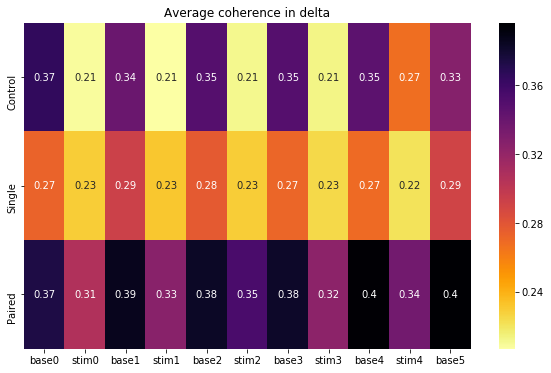

MonkeyG_20150911_Session2_theta
MonkeyG_20150911_Session5_theta
MonkeyJ_20160624_Session2_theta
MonkeyJ_20160625_Session2_theta


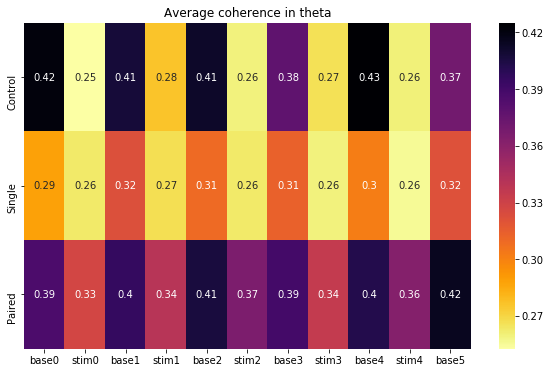

MonkeyG_20150911_Session2_alpha
MonkeyG_20150911_Session5_alpha
MonkeyJ_20160624_Session2_alpha
MonkeyJ_20160625_Session2_alpha


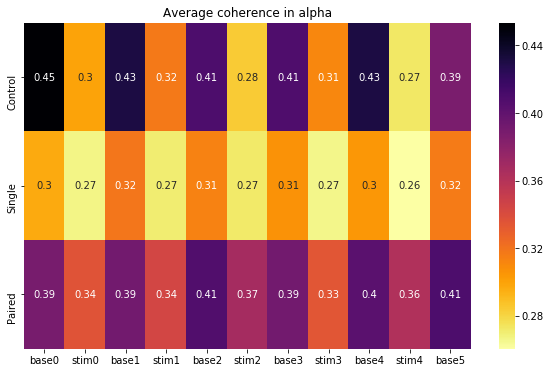

MonkeyG_20150911_Session2_beta
MonkeyG_20150911_Session5_beta
MonkeyJ_20160624_Session2_beta
MonkeyJ_20160625_Session2_beta


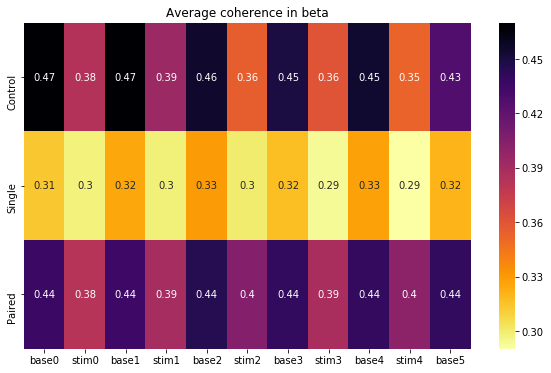

MonkeyG_20150911_Session2_gamma
MonkeyG_20150911_Session5_gamma
MonkeyJ_20160624_Session2_gamma
MonkeyJ_20160625_Session2_gamma


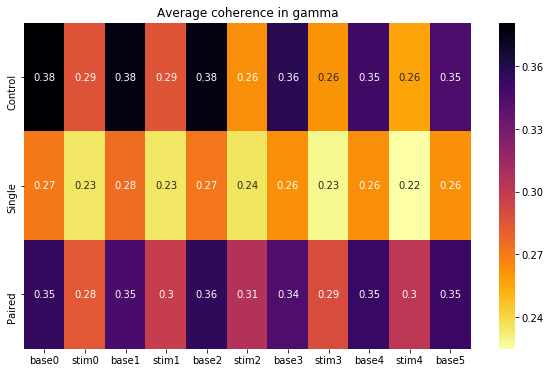

In [27]:
# Average coherence data
for band in ["delta", "theta", "alpha", "beta", "gamma"]: #, "high_gamma"]:
    control_coh = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                       "base4":[], "stim4":[], "base5":[]}
    single_coh = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                       "base4":[], "stim4":[], "base5":[]}
    paired_coh = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                       "base4":[], "stim4":[], "base5":[]}
    coh_data = [control_coh, single_coh, paired_coh]
    
    exp_names = [[], [], []]
    
    for experiment_key in base_data.keys():
        if experiment_key.endswith(band): # If the data is of the target band
            if band == "gamma" and experiment_key[-10:] == "high_gamma":
                continue
            # Get coherence data
            base_experiment = base_data[experiment_key]
            stim_experiment = stim_data[experiment_key]
            # Get number of lasers used in experiment
            num_las = experiments.loc[experiments['keyname'] == experiment_key[:25]]["Number of Lasers during Conditioning"].values[0]
            coh_data[num_las]["base"+str(0)].append(base_experiment[0])
            
            exp_names[num_las].append(experiment_key[:25])
            
            #for debugging
            if num_las == 0:
                print(experiment_key)
            
            for i in range(5):
                coh_data[num_las]["stim"+str(i)].append(stim_experiment[i])
                coh_data[num_las]["base"+str(i+1)].append(base_experiment[i+1])
                
    control_row = []
    for item in control_coh.items():
        control_row.append(np.mean(item[1]))
        
    single_row = []
    for item in single_coh.items():
        single_row.append(np.mean(item[1]))
        
    paired_row = []
    for item in paired_coh.items():
        paired_row.append(np.mean(item[1]))
        
    plt.subplots(figsize=(10,6))
    plt.title("Average coherence in "+band)    
    sns.heatmap(np.vstack((control_row, single_row, paired_row)), xticklabels=control_coh.keys(),
                   yticklabels=["Control", "Single", "Paired"], cmap="inferno_r", annot=True)
    plt.show()
print()

Control data.


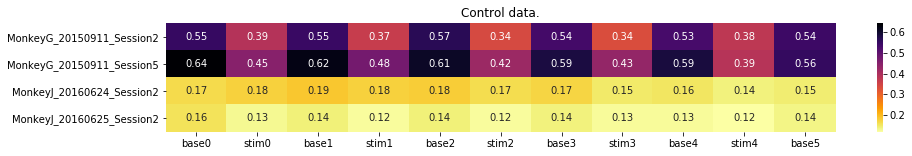

Single stim data.


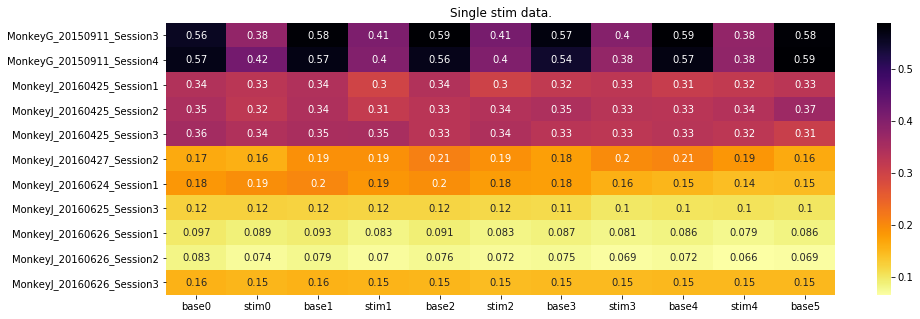

Paired stim data.


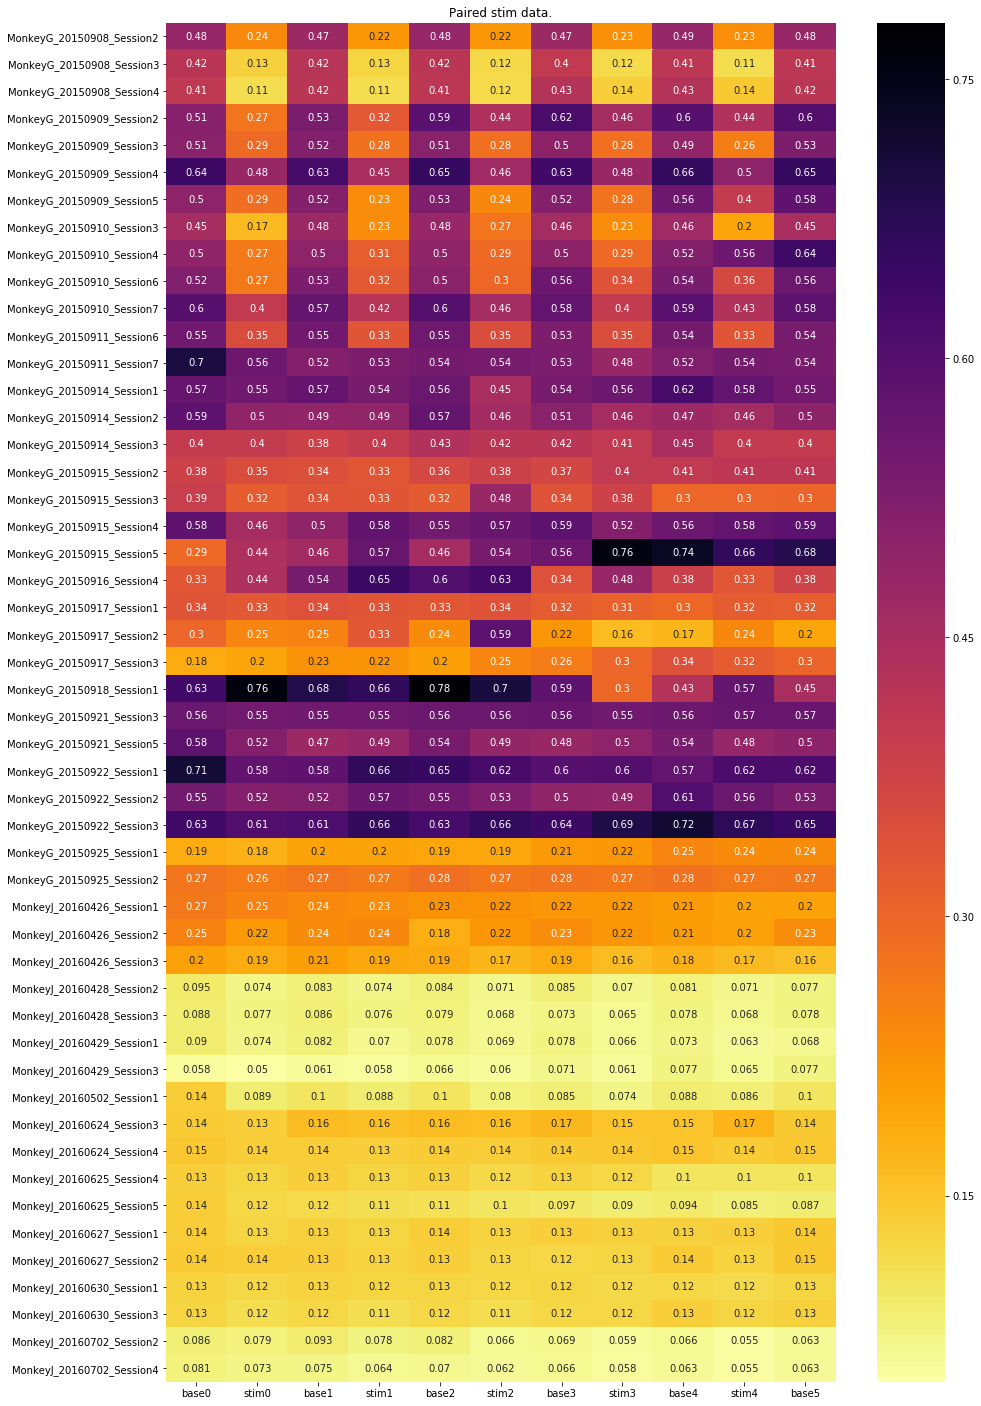

In [29]:
messages = ["Control data.", "Single stim data.", "Paired stim data."]
i = 0
for d in coh_data:
    print(messages[i])
    numsess = len(d['base0'])
    controls = np.zeros((numsess, 11))
    for row in range(numsess):
        col = 0
        for item in d.items():
            controls[row, col] = np.mean(item[1][row])
            col += 1
#             print(item == d[d.keys()[col]])
    plt.subplots(figsize=(15,numsess//2))
    plt.title(messages[i])
    sns.heatmap(controls, xticklabels=d.keys(), yticklabels=exp_names[i], cmap="inferno_r", annot=True)
    plt.show()
    i += 1

Control data.


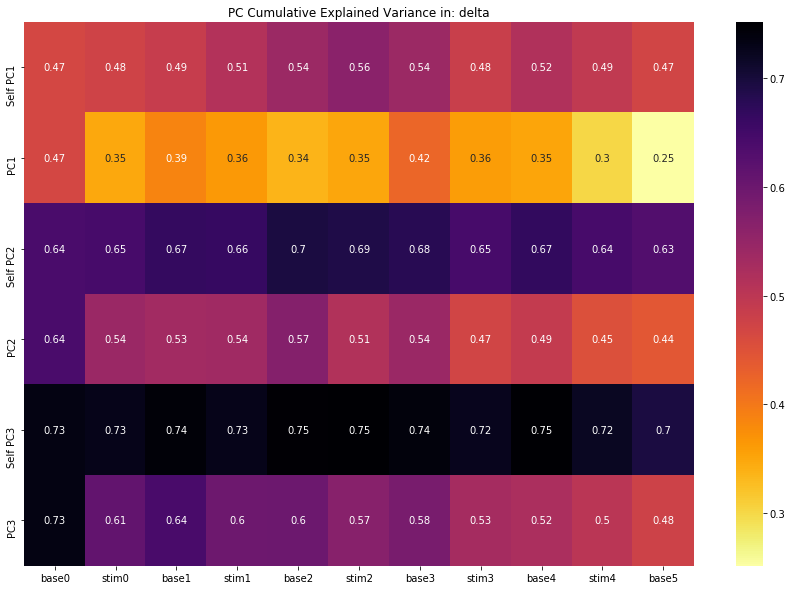

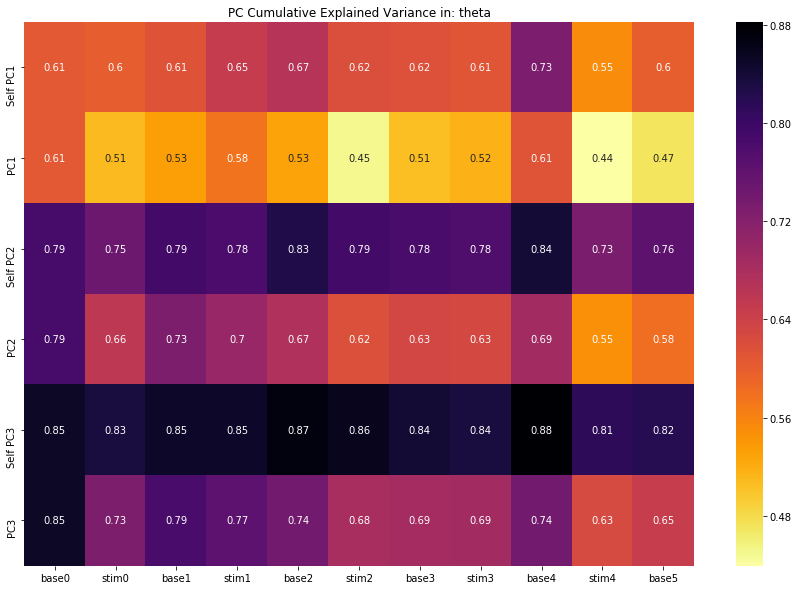

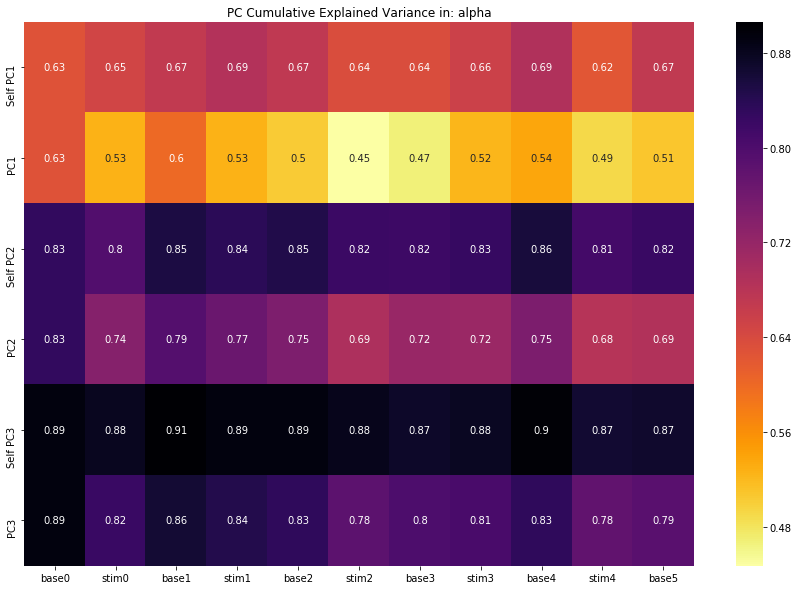

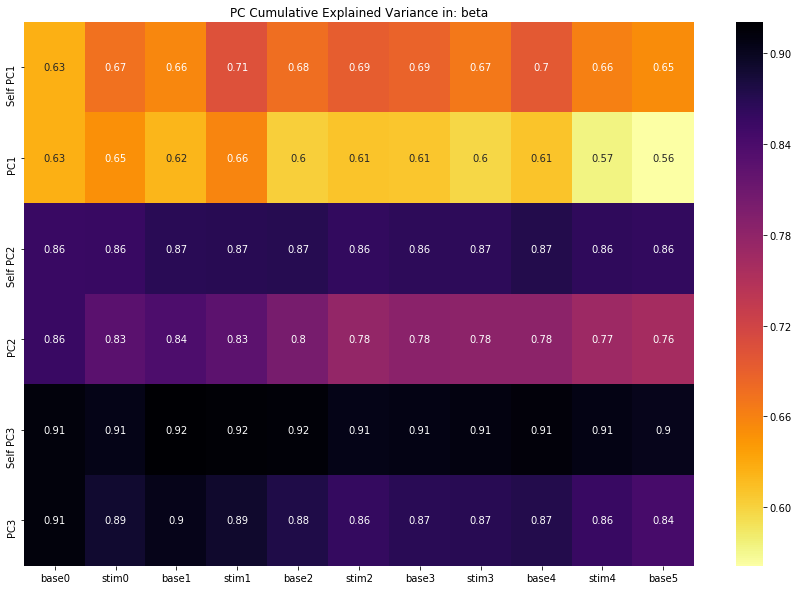

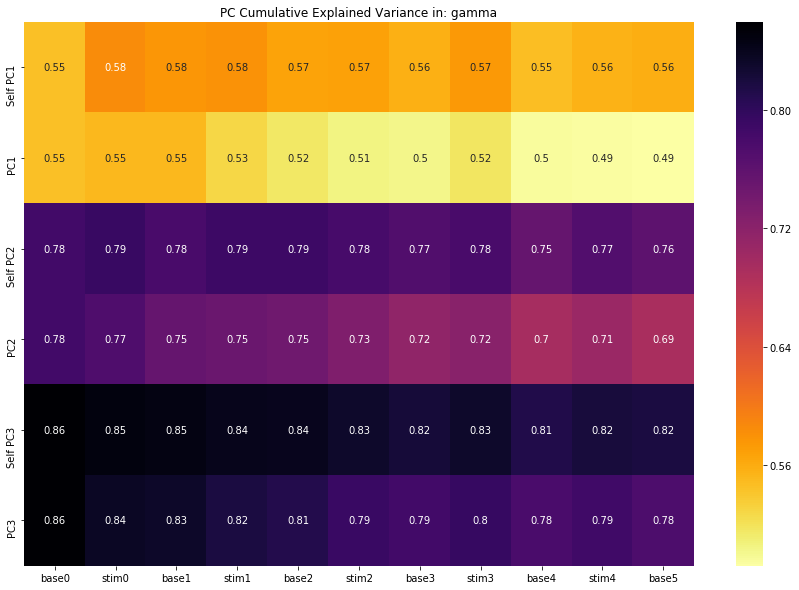

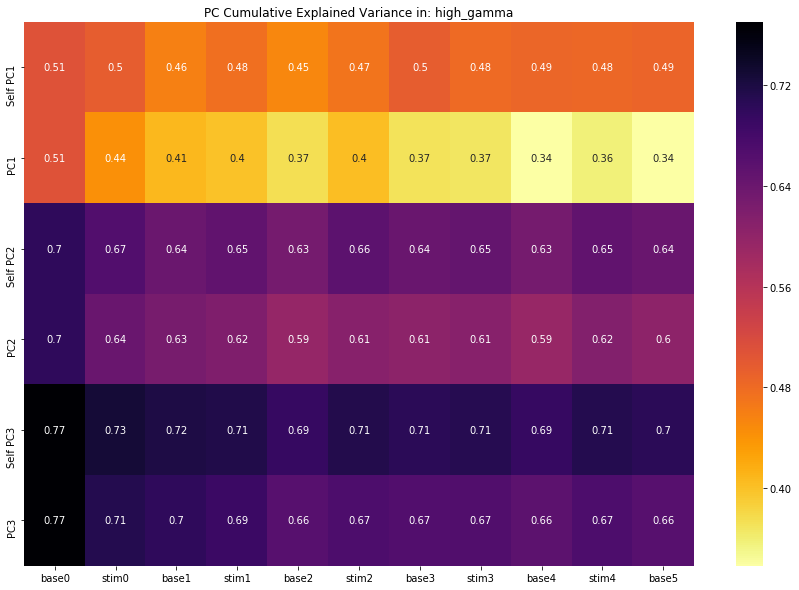


Single stim data.


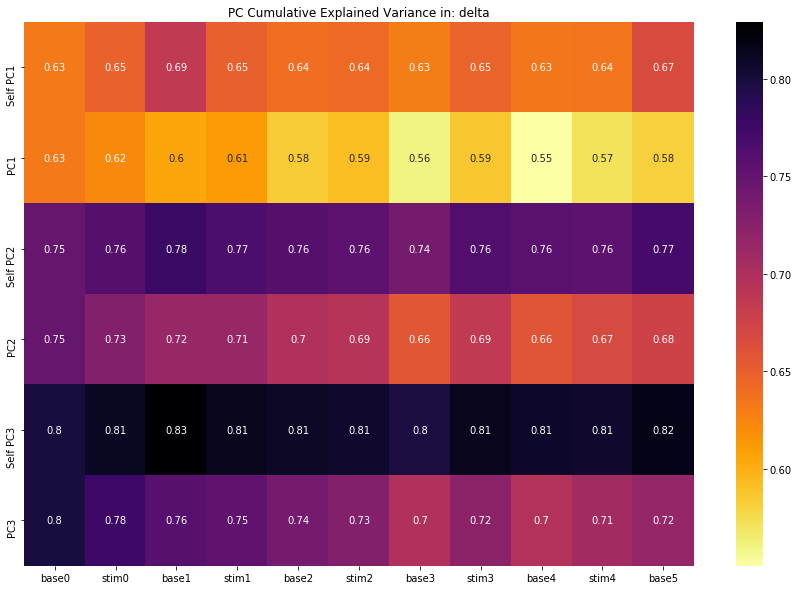

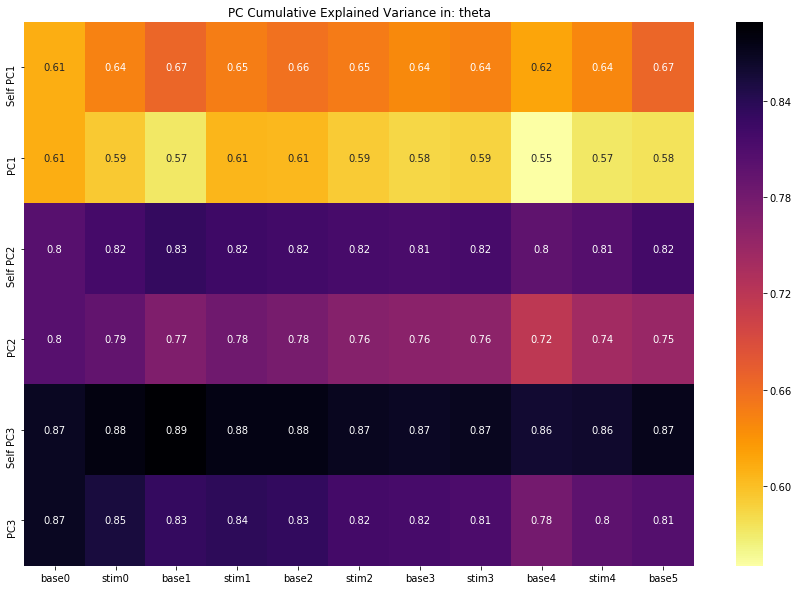

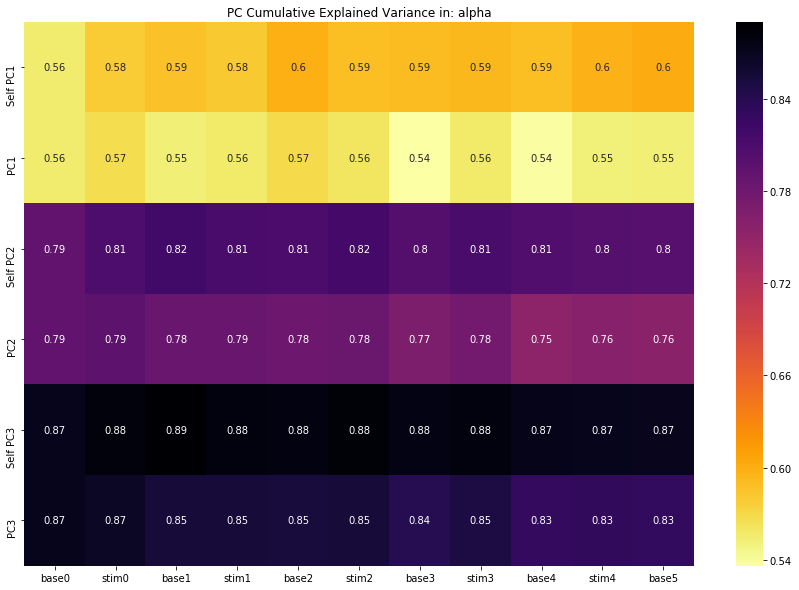

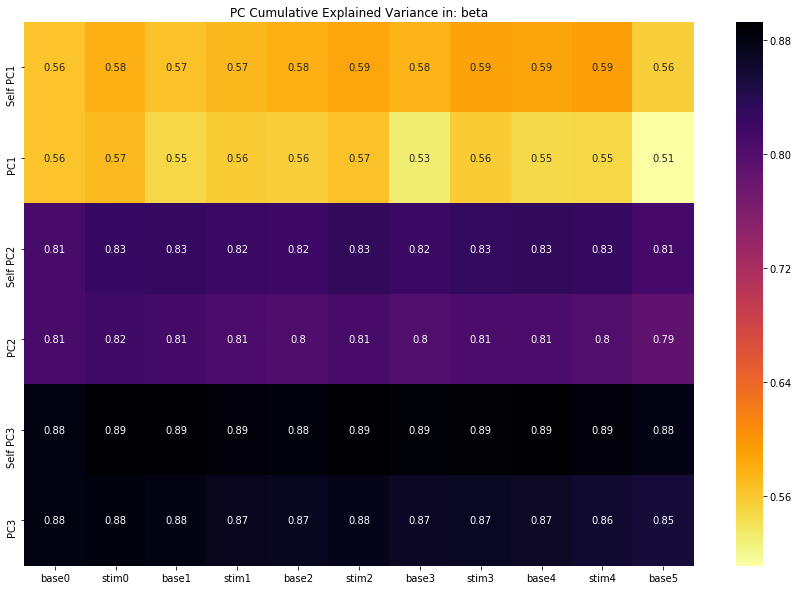

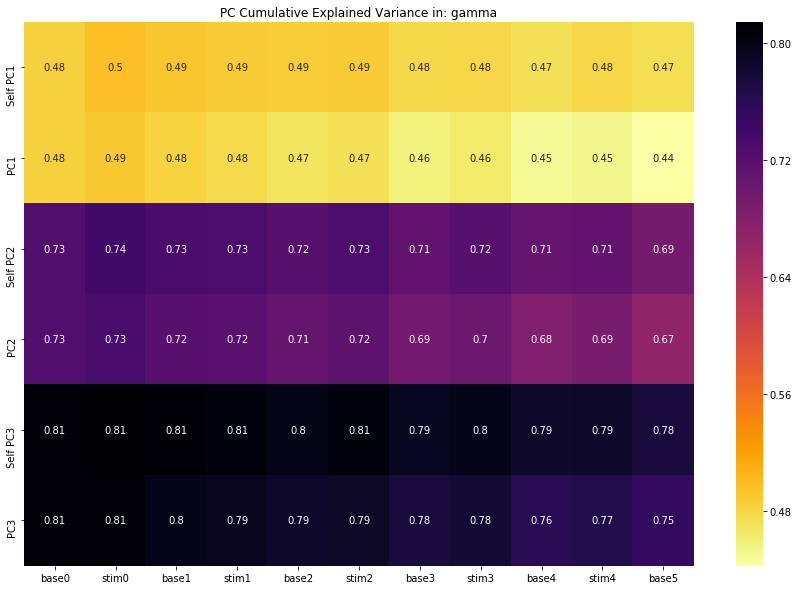

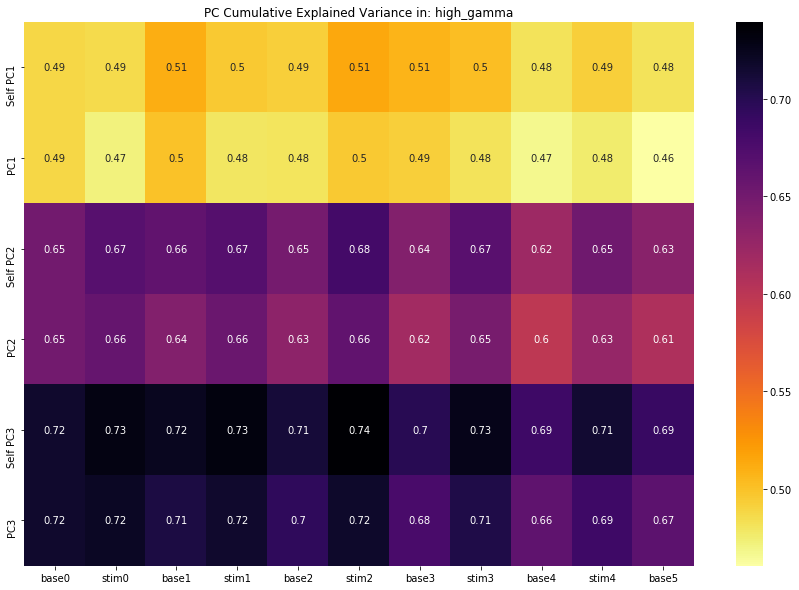


Paired stim data.


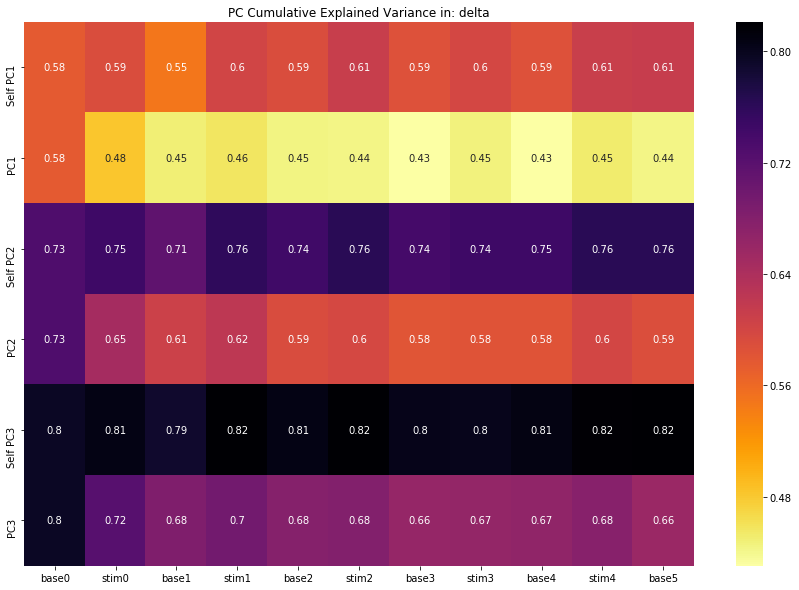

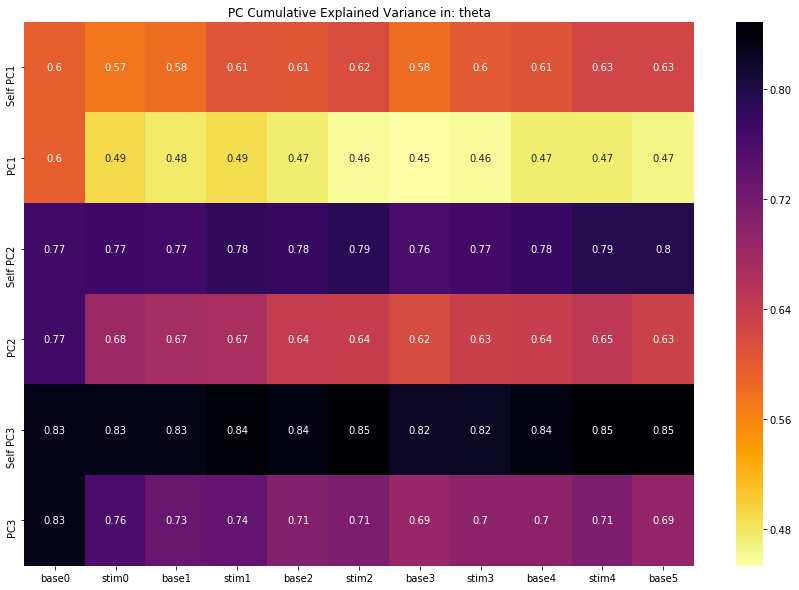

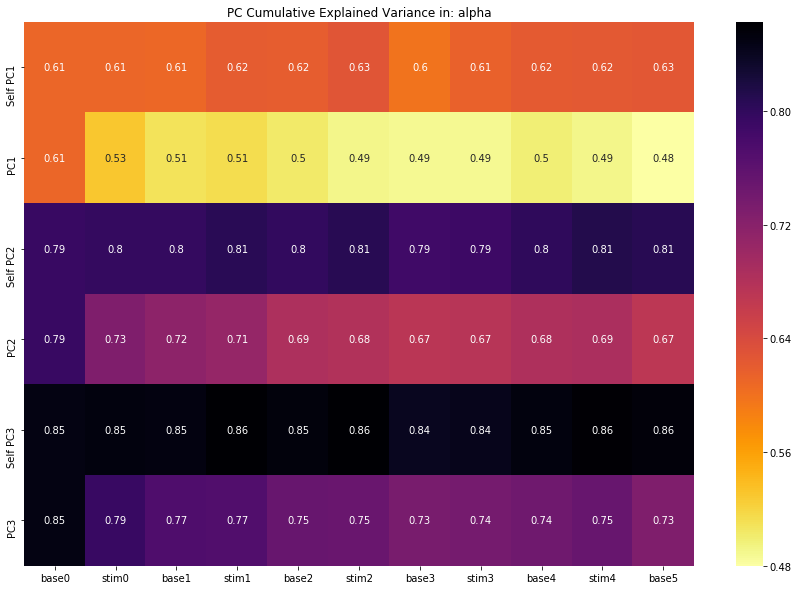

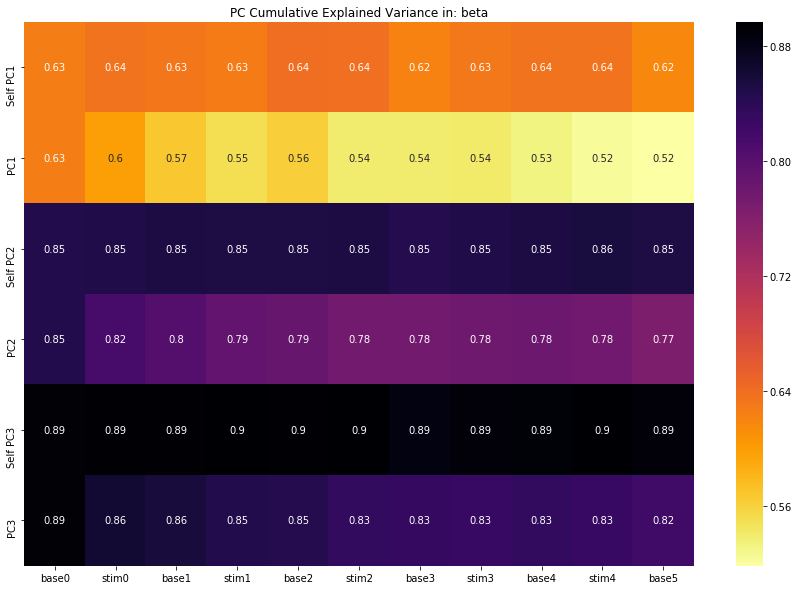

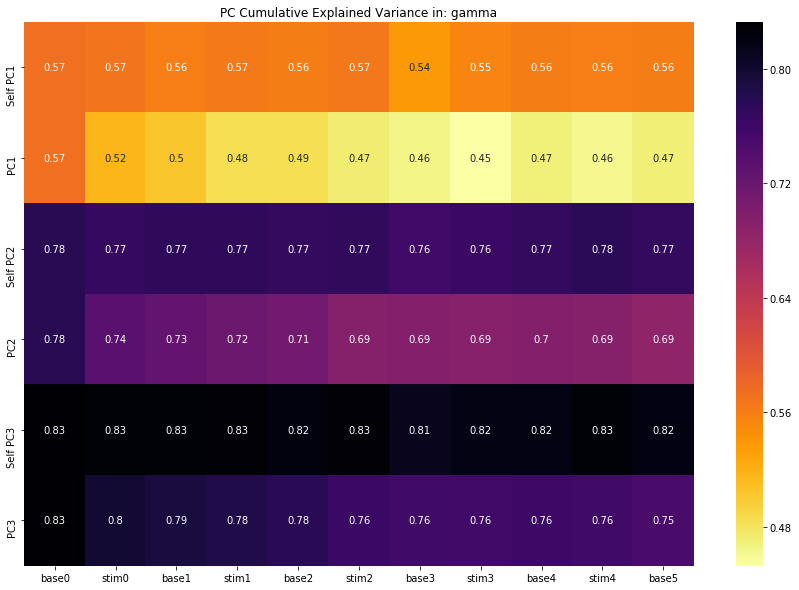

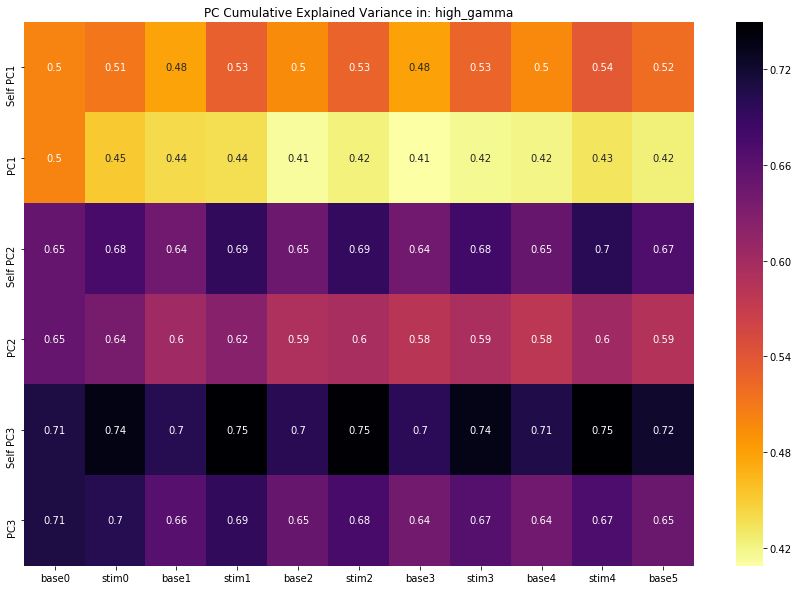

In [15]:
# Explained variance data
messages = ["Control data.", "Single stim data.", "Paired stim data."]
for num_lasers in [0, 1, 2]:
    print(messages[num_lasers])
    for band in ["delta", "theta", "alpha", "beta", "gamma", "high_gamma"]:
        pc1_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}
        pc2_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}
        pc3_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}
        pc1_self_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}    
        pc2_self_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}
        pc3_self_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                           "base4":[], "stim4":[], "base5":[]}

        for experiment_key in base_data.keys():
            # Get number of lasers used in experiment
            num_las = experiments.loc[experiments['keyname'] == experiment_key[:25]]["Number of Lasers during Conditioning"].values[0]
            if num_las != num_lasers:
                continue # Skip if not the target number of lasers
            if experiment_key.endswith(band): # If the data is of the target band
                if band == "gamma" and experiment_key[-10:] == "high_gamma":
                    continue
                base_experiment = base_data[experiment_key]
                stim_experiment = stim_data[experiment_key]

                pca = PCA(n_components = 3)
                pca.fit(base_experiment[0]) # Fit 3rd order PCA fo the baseline data

                pc1_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[0])
                pc2_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[1])
                pc3_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[2])
                pc1_self_expl_vars["base0"].append(pca.explained_variance_ratio_[0])
                pc2_self_expl_vars["base0"].append(pca.explained_variance_ratio_[1])
                pc3_self_expl_vars["base0"].append(pca.explained_variance_ratio_[2])

                for i in range(5):
                    pca_self_stim = PCA(n_components = 3)
                    pca_self_stim.fit(stim_experiment[i])
                    pc1_self_expl_vars["stim"+str(i)].append(pca_self_stim.explained_variance_ratio_[0])
                    pc2_self_expl_vars["stim"+str(i)].append(pca_self_stim.explained_variance_ratio_[1])
                    pc3_self_expl_vars["stim"+str(i)].append(pca_self_stim.explained_variance_ratio_[2])

                    pc1_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[0])) / np.var(stim_experiment[i], axis=0).sum())
                    pc2_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[1])) / np.var(stim_experiment[i], axis=0).sum())
                    pc3_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[2])) / np.var(stim_experiment[i], axis=0).sum())

                    pca_self_base = PCA(n_components = 3)
                    pca_self_base.fit(base_experiment[i+1])
                    pc1_self_expl_vars["base"+str(i+1)].append(pca_self_base.explained_variance_ratio_[0])
                    pc2_self_expl_vars["base"+str(i+1)].append(pca_self_base.explained_variance_ratio_[1])
                    pc3_self_expl_vars["base"+str(i+1)].append(pca_self_base.explained_variance_ratio_[2])

                    pc1_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[0])) / np.var(base_experiment[i+1], axis=0).sum())
                    pc2_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[1])) / np.var(base_experiment[i+1], axis=0).sum())
                    pc3_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[2])) / np.var(base_experiment[i+1], axis=0).sum())

        self1_expvar = []
        for item in pc1_self_expl_vars.items():
            self1_expvar.append(np.mean(item[1]))

        self2_expvar = []
        for item in pc2_self_expl_vars.items():
            self2_expvar.append(np.mean(item[1]))
        self2_expvar_cumsum = np.array(self2_expvar) + np.array(self1_expvar)

        self3_expvar = []
        for item in pc3_self_expl_vars.items():
            self3_expvar.append(np.mean(item[1]))
        self3_expvar_cumsum = np.array(self3_expvar) + np.array(self2_expvar_cumsum)

        pc1_expvar = []
        for item in pc1_rec_expl_vars.items():
            pc1_expvar.append(np.mean(item[1]))

        pc2_expvar = []
        for item in pc2_rec_expl_vars.items():
            pc2_expvar.append(np.mean(item[1]))
        pc2_expvar_cumsum = np.array(pc2_expvar) + np.array(pc1_expvar)

        pc3_expvar = []
        for item in pc3_rec_expl_vars.items():
            pc3_expvar.append(np.mean(item[1]))
        pc3_expvar_cumsum = np.array(pc3_expvar) + np.array(pc2_expvar_cumsum)

        plt.subplots(figsize=(15,10))
        plt.title("PC Cumulative Explained Variance in: "+band)
        sns.heatmap(np.vstack((self1_expvar, pc1_expvar, self2_expvar_cumsum, pc2_expvar_cumsum, self3_expvar_cumsum, pc3_expvar_cumsum)), xticklabels=pc1_rec_expl_vars.keys(),
                       yticklabels=["Self PC1", "PC1", "Self PC2", "PC2", "Self PC3", "PC3"], cmap="inferno_r", annot=True)
        plt.show()
    print()

In [16]:
pca.explained_variance_ratio_[2]

0.04723119369534555

In [17]:
(np.var(np.dot(base_experiment[0],pca.components_[2])) / np.var(base_experiment[0], axis=0).sum())

0.047231193695345584

(array([44., 14.,  9.,  0.,  1.,  4.,  7.,  6.,  4.,  7.]),
 array([0.00979822, 0.01489338, 0.01998854, 0.02508371, 0.03017887,
        0.03527403, 0.04036919, 0.04546436, 0.05055952, 0.05565468,
        0.06074984]),
 <a list of 10 Patch objects>)

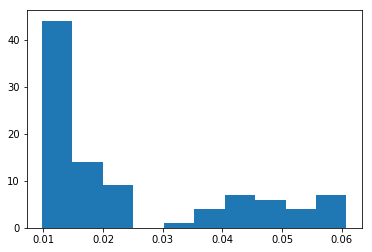

In [18]:
plt.hist(np.var(base_experiment[0], axis=0))

In [19]:
np.var(base_experiment[0], axis=0)

array([0.0489536 , 0.05597684, 0.02507453, 0.05601737, 0.06071663,
       0.01400899, 0.01400801, 0.04448141, 0.0536559 , 0.04902619,
       0.04015035, 0.01420917, 0.05043481, 0.04118957, 0.01421197,
       0.01173046, 0.01178958, 0.04512033, 0.05710944, 0.04005083,
       0.06074984, 0.01552594, 0.01201115, 0.00991667, 0.05043625,
       0.04318537, 0.01957231, 0.0221913 , 0.01300944, 0.01763   ,
       0.01968174, 0.0214255 , 0.010229  , 0.01371059, 0.01238563,
       0.01083494, 0.01166477, 0.01495418, 0.01970458, 0.01155348,
       0.01785738, 0.0138359 , 0.01051038, 0.01990443, 0.0201847 ,
       0.01638168, 0.01248143, 0.05905309, 0.01022296, 0.01117572,
       0.01177948, 0.01185723, 0.01214888, 0.0157664 , 0.01301207,
       0.0141226 , 0.01062405, 0.01721817, 0.00996187, 0.0188558 ,
       0.01176641, 0.01804917, 0.01130074, 0.01177688, 0.02368099,
       0.01154821, 0.00990011, 0.0123493 , 0.02370813, 0.01143066,
       0.02143774, 0.01012025, 0.05216557, 0.01180592, 0.05771

In [30]:
pc1_rec_expl_vars.keys()

dict_keys(['base0', 'stim0', 'base1', 'stim1', 'base2', 'stim2', 'base3', 'stim3', 'base4', 'stim4', 'base5'])